In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 

In [2]:
df = pd.read_csv("bank - bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
#Data Pre-Processing
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [6]:
encoded_df = preprocessor(df)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1


In [7]:
#seperating X and Y
x = encoded_df.drop('deposit', axis=1).values 
y = encoded_df['deposit'].values

In [8]:
#Split data into train and test data sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
#Build Decision Tree Model 
#Decision tree with Cart(Gini)
#decision tree with depth 4

model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)

y_pred_4 = model_dt_4.predict(x_test)
accuracy_score_4 = accuracy_score(y_test, y_pred_4)
print('Accuracy Score for model with depth 4 is', accuracy_score_4)

Accuracy Score for model with depth 4 is 0.7971339005821765


In [10]:
#decision tree with depth 6

model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6)
model_dt_6.fit(x_train, y_train)

y_pred_6 = model_dt_6.predict(x_test)
accuracy_score_6 = accuracy_score(y_test, y_pred_6)
print('Accuracy Score for model with depth 6 is', accuracy_score_6)

Accuracy Score for model with depth 6 is 0.8096730855351545


In [16]:
#Decision tree with depth 8

model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8)
model_dt_8.fit(x_train,y_train)

y_pred_8 = model_dt_8.predict(x_test)
accuracy_score_8 = accuracy_score(y_test,y_pred_8)
print("the accuracy score for model with depth 8 is", accuracy_score_8)

the accuracy score for model with depth 8 is 0.8208687863860278


In [17]:
#Decision tree with c4.5(entrophy)

model_dt_ent = DecisionTreeClassifier(random_state=1, criterion='entropy')
model_dt_ent.fit(x_train,y_train)

y_pred_ent = model_dt_ent.predict(x_test)
accuracy_score_ent = accuracy_score(y_test,y_pred_ent)
print("the accuracy score for model with depth 8 is", accuracy_score_ent)

the accuracy score for model with depth 8 is 0.799820868786386


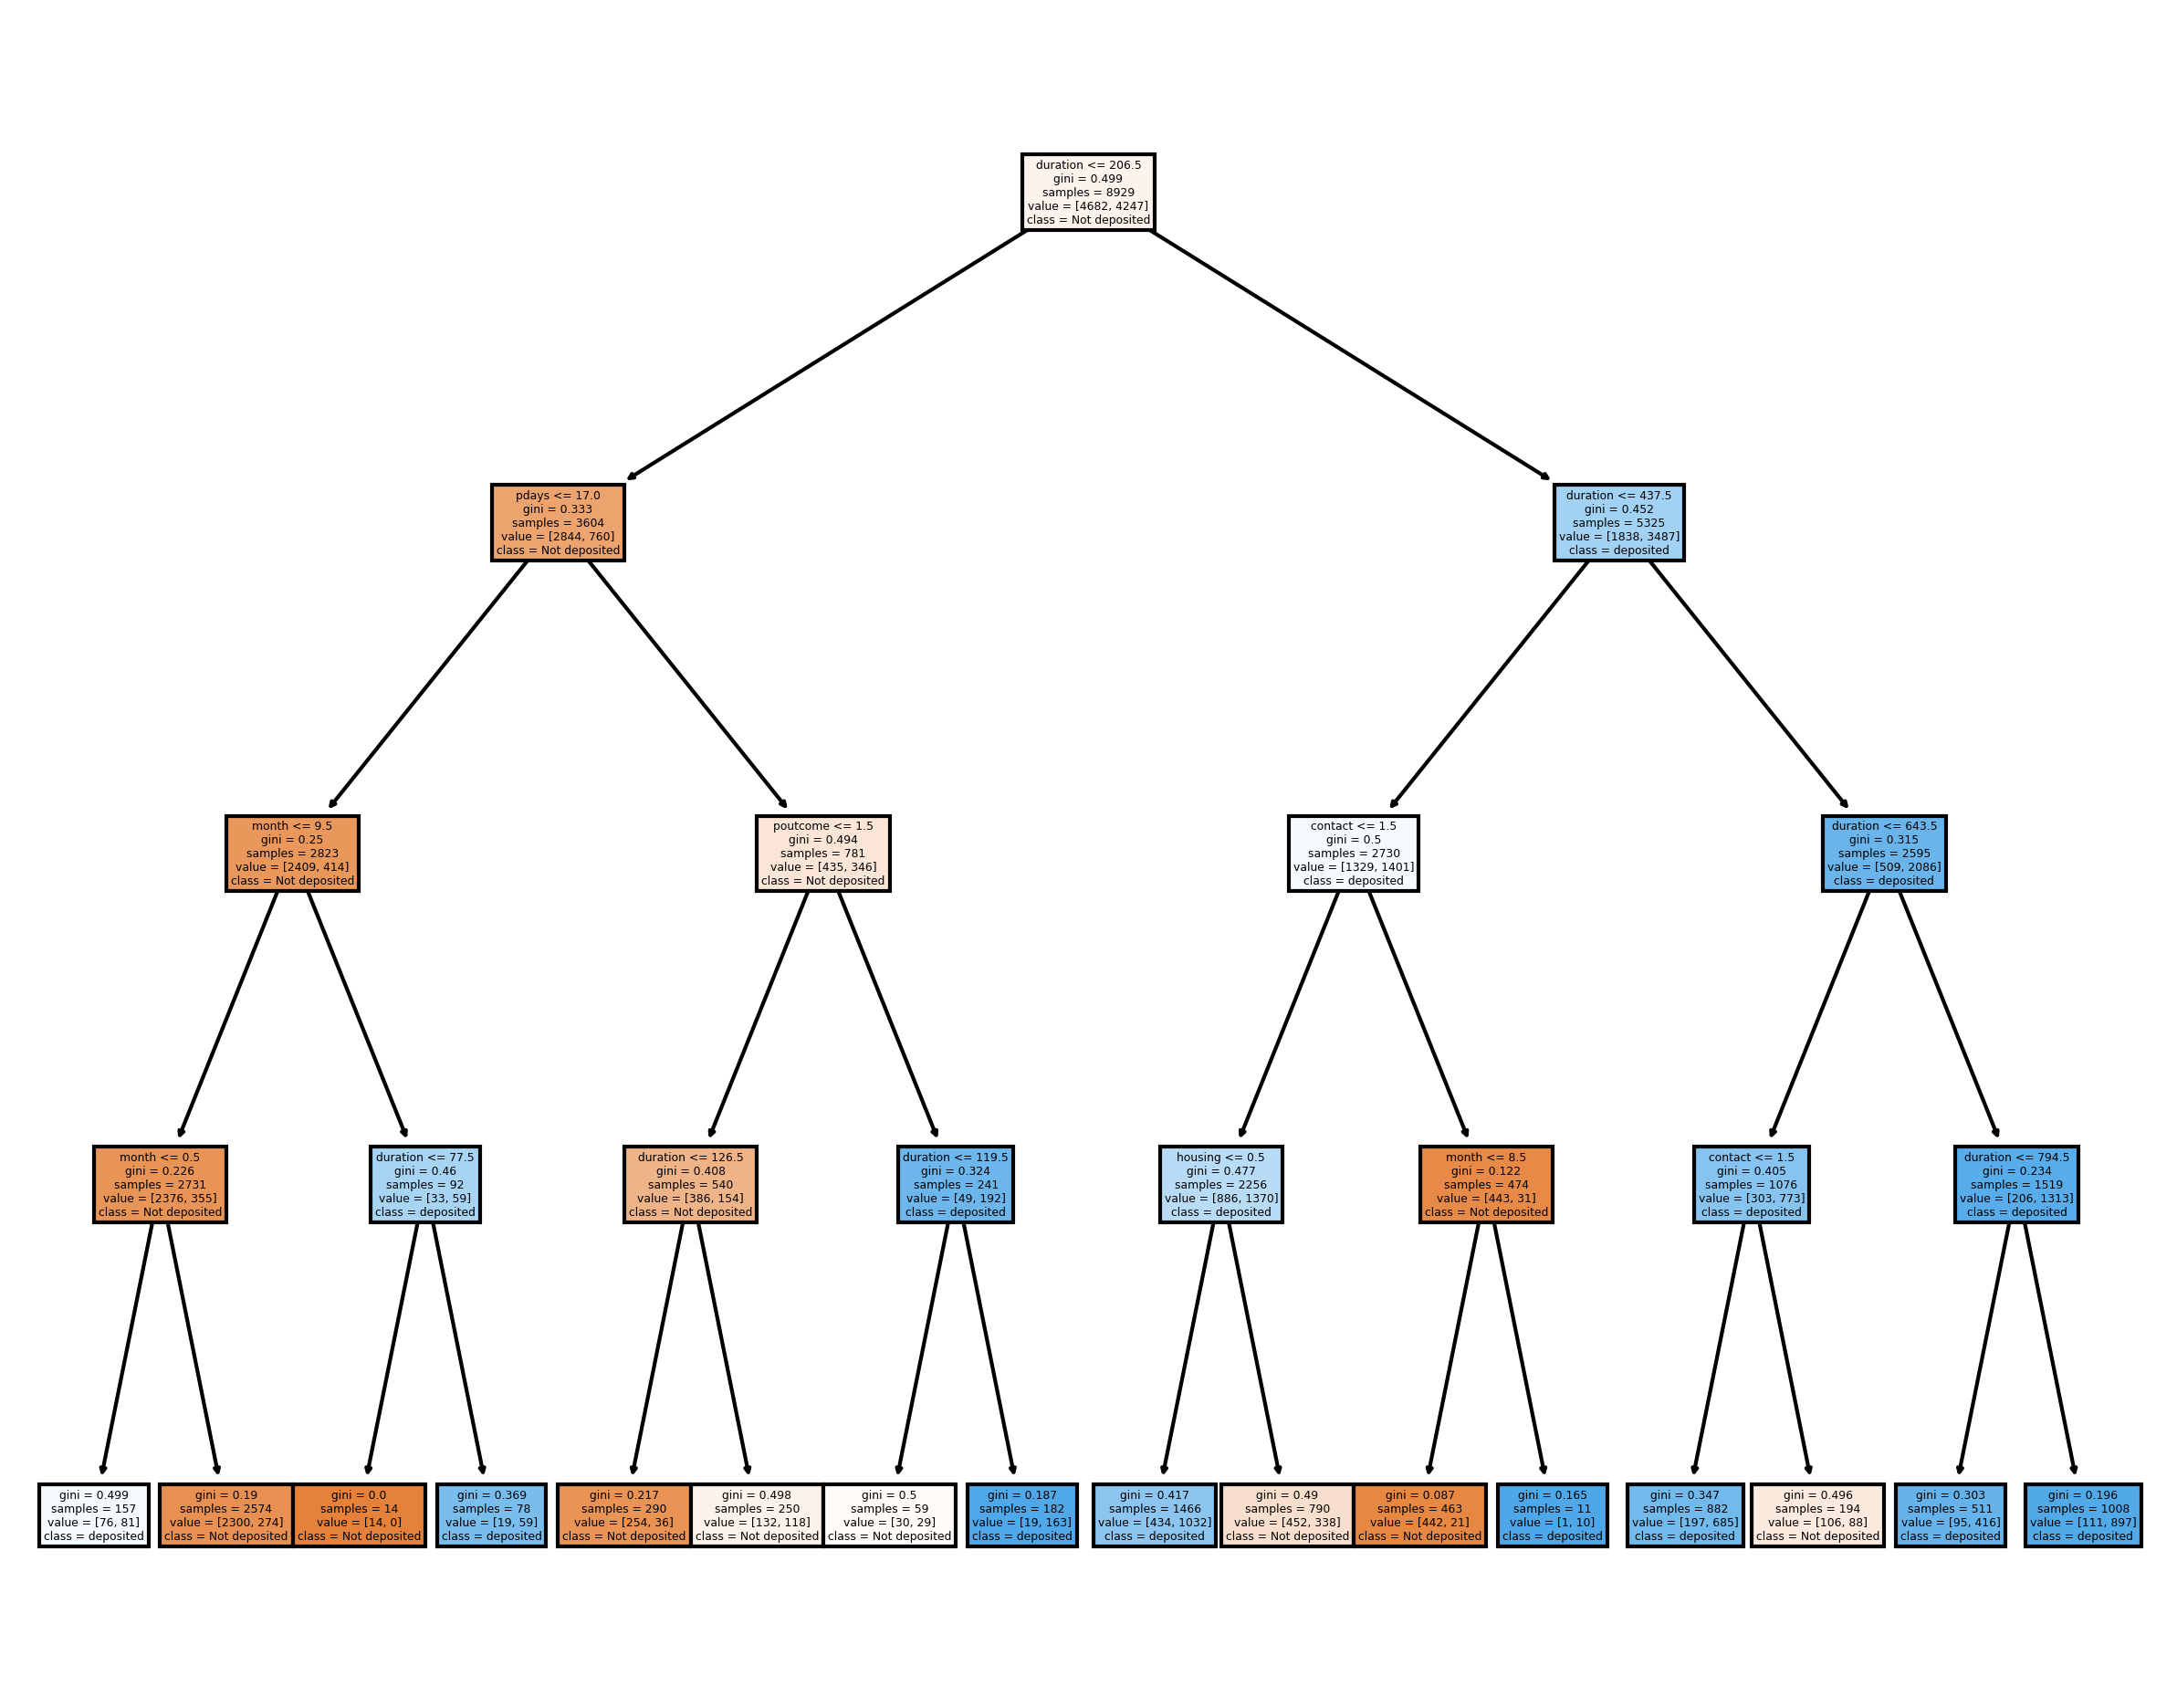

In [20]:
#Graphical Representation of tree

from sklearn import tree
df1=pd.DataFrame(df.drop(['deposit'],axis=1))
column_names = list(df1.columns)
fn=column_names
cn=['Not deposited', 'deposited']

fig, axes = plt.subplots(nrows = 1,ncols=1,figsize=(10,8), dpi=300)

tree.plot_tree(model_dt_4,
              feature_names=fn,
              class_names=cn,
              filled= True);

fig.savefig('DecisionTree.png')

In [22]:
#Classification Report

print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1191
           1       0.77      0.84      0.81      1042

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [23]:
#Area Under the Curve

fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_6)
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(accuracy_score(y_test,y_pred_6))

0.8096730855351545
